<a href="https://colab.research.google.com/github/alamin19/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#df.rename(columns={'Genre': 'Gender'}, inplace= True)

df.rename(columns={'Genre': 'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

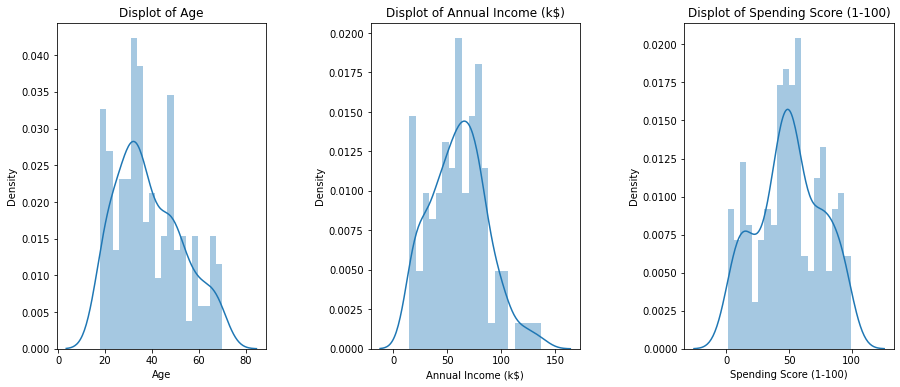

In [10]:
plt.figure(1, figsize=(15,6))
i=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  i += 1
  plt.subplot(1, 3, i)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('Displot of {}'.format(x))
plt.show()

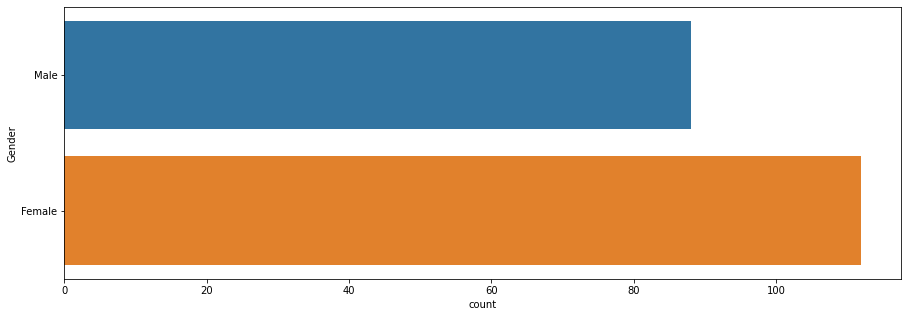

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

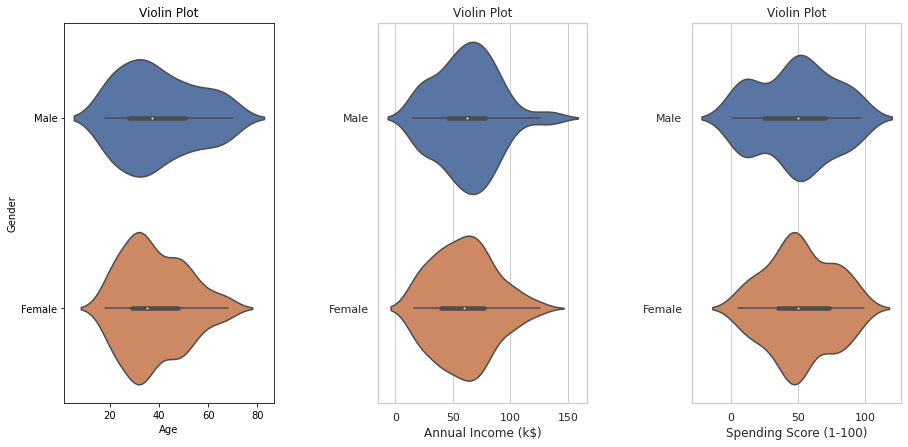

In [12]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1, 3, n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace= 0.5, wspace =0.5)
  sns.violinplot(x = cols, y = 'Gender', data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')
plt.show()

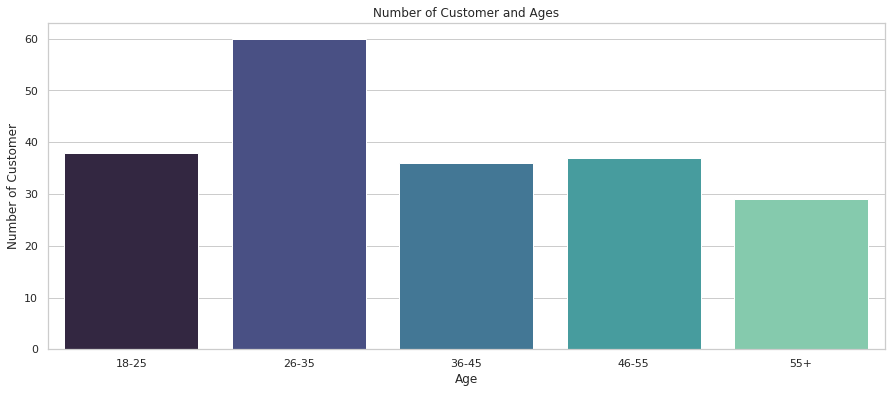

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25","26-35","36-45","46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values),len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

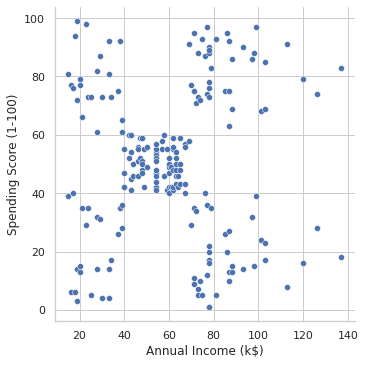

In [14]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

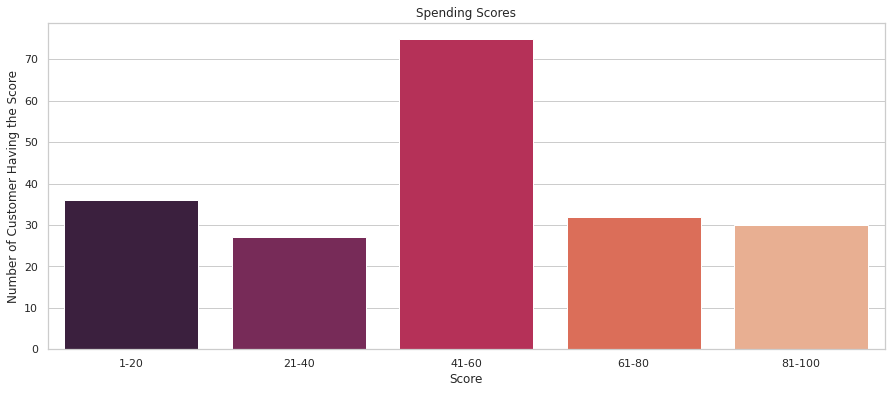

In [19]:
ss_1_20 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>= 1)& (df["Spending Score (1-100)"]<=20)]
ss_21_40 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>= 21)& (df["Spending Score (1-100)"]<=40)]
ss_41_60 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>= 41)& (df["Spending Score (1-100)"]<=60)]
ss_61_80 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>= 61)& (df["Spending Score (1-100)"]<=80)]
ss_81_100 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>= 81)& (df["Spending Score (1-100)"]<=100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()


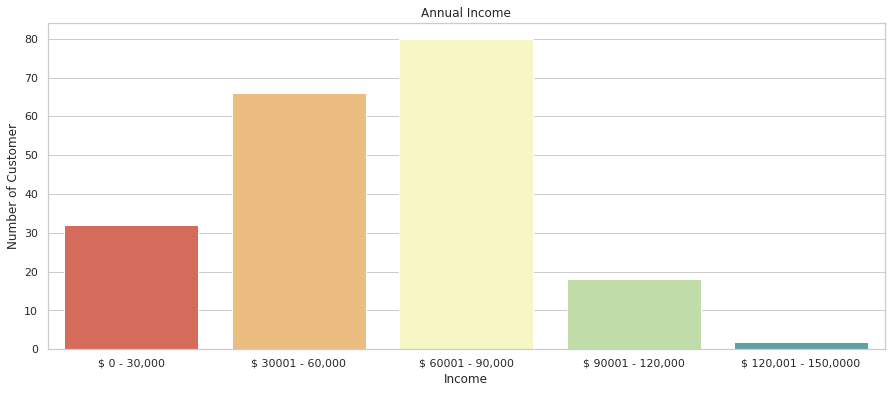

In [27]:
ai0_30 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >=0)& (df["Annual Income (k$)"] <=30)]
ai31_60 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >=31)& (df["Annual Income (k$)"] <=60)]
ai61_90 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >=61)& (df["Annual Income (k$)"] <=90)]
ai91_120 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >=91)& (df["Annual Income (k$)"] <=120)]
ai121_150 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >=131)& (df["Annual Income (k$)"] <=150)]

aix = ["$ 0 - 30,000", "$ 30001 - 60,000", "$ 60001 - 90,000", "$ 90001 - 120,000", "$ 120,001 - 150,0000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

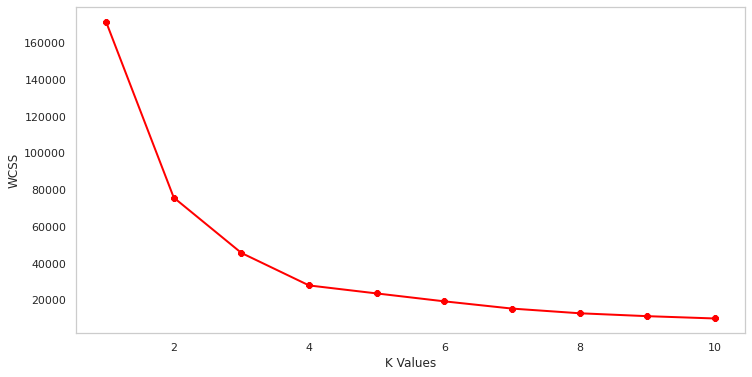

In [35]:
X1 = df.loc[:,["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2,color="red",marker="8")
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [37]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


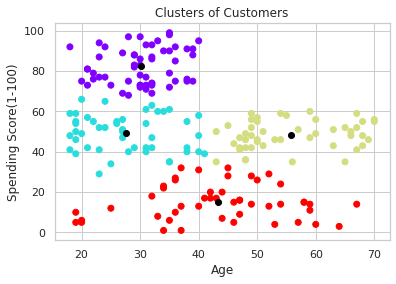

In [38]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()